## school / category
#### 依學校or 類別分類 (分類方式參見word檔)

In [13]:
import pandas as pd

department_ds = pd.read_csv('108cat3.csv', encoding="utf-8", dtype=str) 

depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['school_group_my']    #school:學校, category:系所類別

ndep = department_ds.shape[0] 

department_ds.head(10)

,school_id,dep_id,school_name,department_name,depname_abbr,school_group_my,category_id,category_name,basic_class_rank,basic_preference_score,des_class_rank,new_des_score
0,7,7052,高雄醫學大學,口腔衛生學系,高醫口腔衛生,1,9,醫藥衛生及社會福利,118,0.386676,137,379.1964997
1,109,109142,臺北醫學大學,口腔衛生學系,北醫口腔衛生,1,9,醫藥衛生及社會福利,113,0.481894,84,426.6682235
2,3,3342,國立中興大學,土壤環境科學系,中興土壤環境,3,8,農業、林業、漁業及獸醫,103,0.567374,146,372.8630859
3,12,12122,中國醫藥大學,中國藥學暨中藥資源學系,中醫中藥資源,1,9,醫藥衛生及社會福利,132,0.225052,64,449.0771788
4,30,30022,長庚大學,中醫學系,長庚中醫,1,9,醫藥衛生及社會福利,18,2.449671,12,509.0703679
5,12,12042,中國醫藥大學,中醫學系乙組,中醫中醫乙,1,9,醫藥衛生及社會福利,40,1.793779,15,505.8619982
6,12,12032,中國醫藥大學,中醫學系甲組,中醫中醫甲,1,9,醫藥衛生及社會福利,36,1.812198,9,510.3856499
7,7,7112,高雄醫學大學,公共衛生學系,高醫公共衛生,1,9,醫藥衛生及社會福利,149,0.042577,163,361.5179293
8,26,26182,中山醫學大學,公共衛生學系,中山醫公共衛生,1,9,醫藥衛生及社會福利,195,-0.316893,164,358.4449324
9,20,20112,輔仁大學,公共衛生學系,輔仁公共衛生,1,9,醫藥衛生及社會福利,127,0.260168,181,345.0146984


In [14]:
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
import numpy as np
ChineseFont2 = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')

category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    dep_color[i] = int(dep_color[i])
    dep_color[i] = colors[ dep_color[i]-1 ]

[[0.8670635]]
[15.75297512]
29 東海永續科學工程
70 中正生醫科學
76 南華自然生物科技
85 義守物治
106 靜宜食品營養生技
189 輔仁醫學(公費)
191 義守醫學(公費)
200 中醫醫檢生技


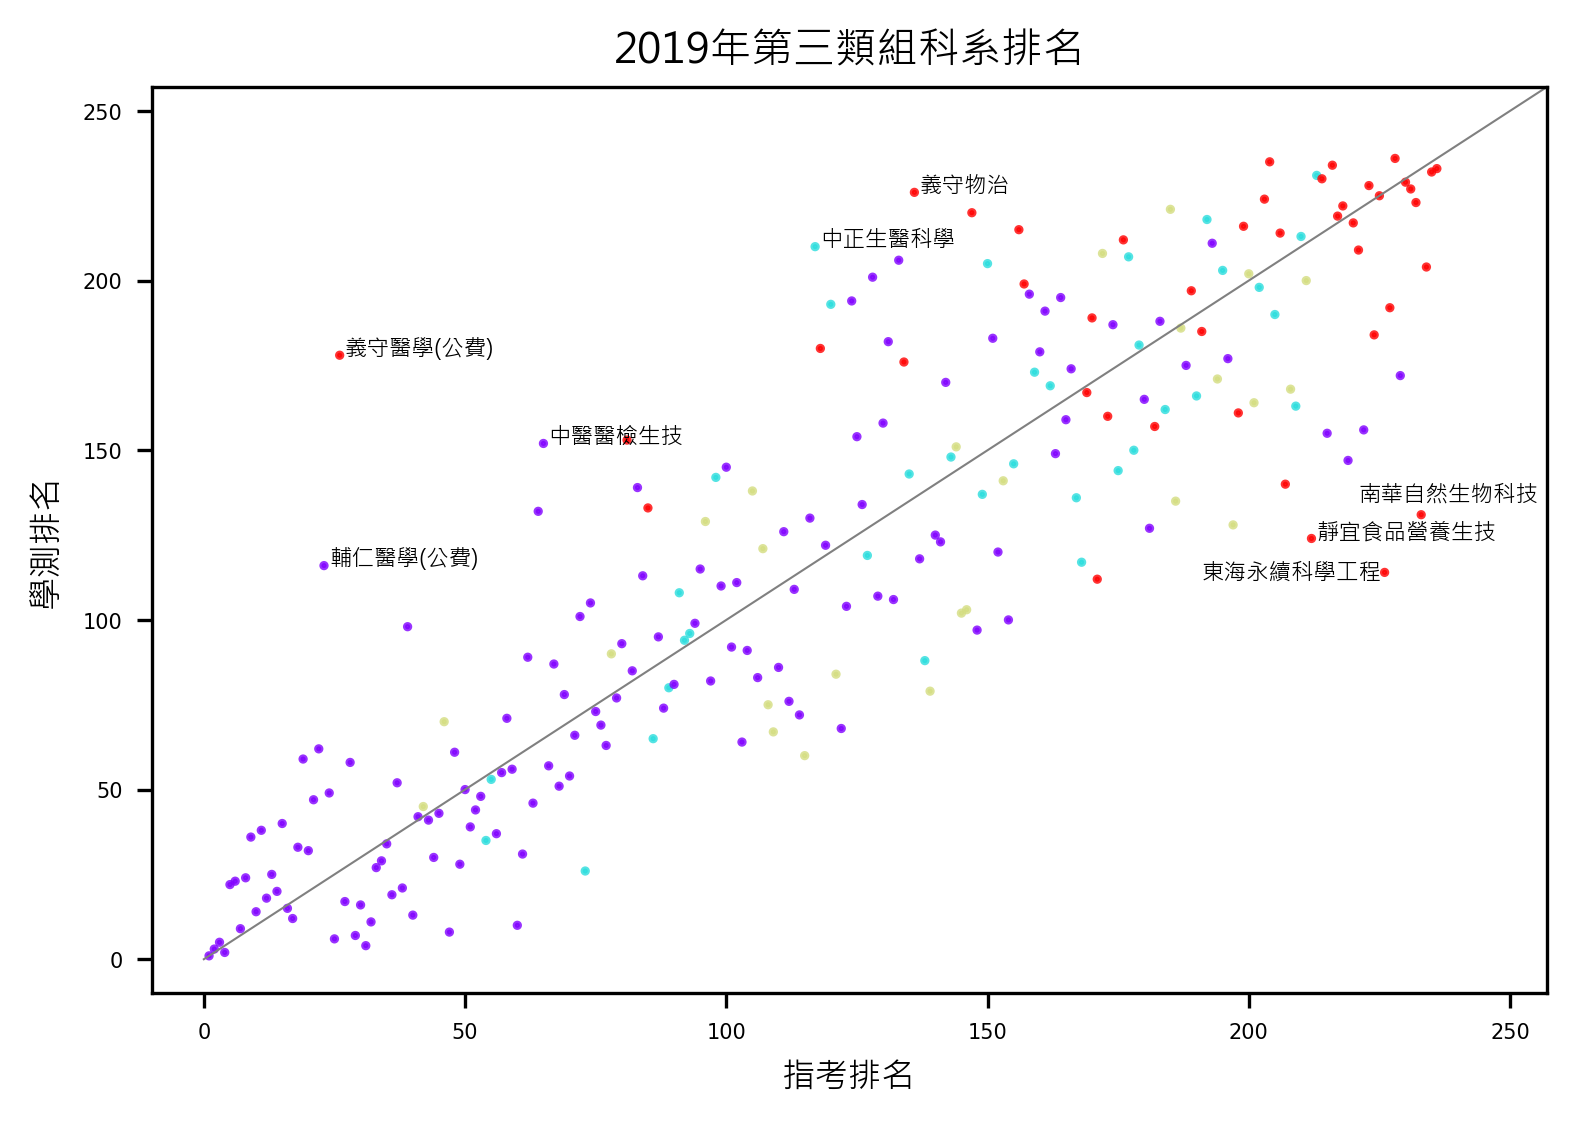

In [15]:
from sklearn.linear_model import LinearRegression

def plot_result(id_, x, y, name, colorid, addname = True, fontsize = 15, markersize = 20,
                dpi = 200, datascale = 1.0, title = None):
    
    for i in range(ndep):
        x[i] = int(x[i]) * datascale
        y[i] = int(y[i]) * datascale
    
    fig, ax = plt.subplots(dpi = dpi)
    if title != None:
        ax.set_title(title, fontproperties=ChineseFont2,fontsize=10)
    ax.scatter(x, y, s = markersize, color = colorid, alpha = 0.8)
    ax.set_xlabel('指考排名', fontproperties=ChineseFont2,fontsize=8)
    ax.set_ylabel('學測排名', fontproperties=ChineseFont2,fontsize=8)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    
    #linear regression 
    lm = LinearRegression()
    x_array = np.array(x)
    y_array = np.array(y)
    lm.fit(np.reshape( x_array, (len(x_array), 1)), np.reshape(y_array, (len(y_array), 1)))
    
    print(lm.coef_)
    print(lm.intercept_)
    #to_be_predicted = np.array([ndep])
    #predicted_y = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))
    #plt.plot(x_array, lm.predict(np.reshape(x_array, (len(x_array), 1))), color='gray', linewidth=0.5)
    ax.set_xlim([-10, 257])
    ax.set_ylim([-10, 257])
    xaxis= np.linspace(0,800)
    plt.plot(xaxis, xaxis, color='gray', linewidth=0.5)
    
   #text
    nameshift = 1
    if addname == True:
        for i, txt in enumerate(name):
            b = y[i] - x[i]         #y = ax + b  b = y - ax   #y = 0.5x +b
            if( b > 80 or b <-80 ):
                print(i, name[i])
                if int(i) == 76:
                    ax.annotate( name[i], (int(x[i]) -12, int(y[i])+4), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 29:
                    ax.annotate( name[i], (int(x[i]) -35, int(y[i])-2), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                else:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])), size = fontsize, color = 'black', fontproperties=ChineseFont2)      
    
    plt.savefig('result/group3-'+str(id_)+'.png')
    plt.show()
    
    
plot_result(1, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 5.4, 
        title = '2019年第三類組科系排名', markersize= 1.5, dpi = 300, datascale = 1)

### legend

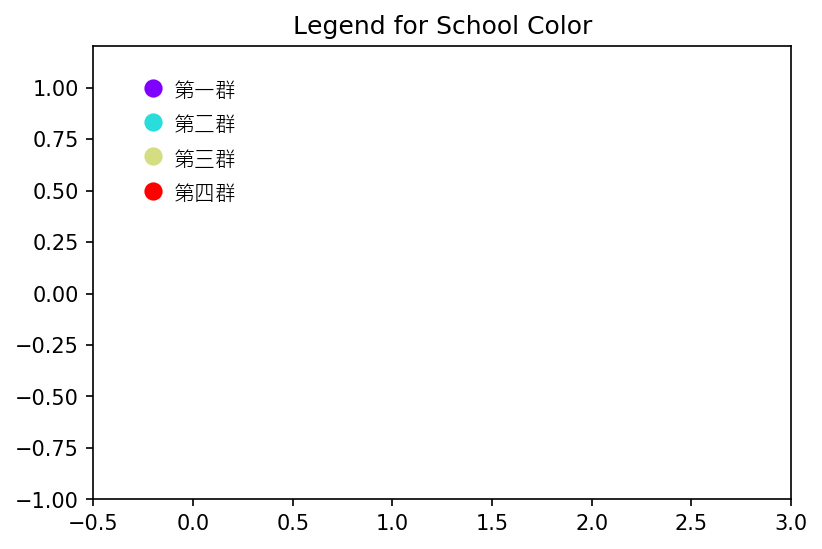

In [21]:
#schoolName = ['有醫學系之學校', '中興大學、嘉義大學', '其他國立大學', '私立']
schoolName = ['第一群', '第二群', '第三群', '第四群']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for School Color")
ax.set_xlim([-0.5, 3])
ax.set_ylim([-1, 1.2])
for i in range(category_df.shape[0]):
    thecolor = colors[i] 
    x = -0.2
    y = 1-i/6  
    ax.scatter(x, y, s = 60, color = thecolor)    
    ax.annotate(schoolName[i], (x+0.1, y-0.05), fontsize=10,  fontproperties=ChineseFont2)
plt.show()



[[0.8670635]]
[15.75297512]
29 東海永續科學工程
70 中正生醫科學
76 南華自然生物科技
85 義守物治
106 靜宜食品營養生技
189 輔仁醫學(公費)
191 義守醫學(公費)
200 中醫醫檢生技


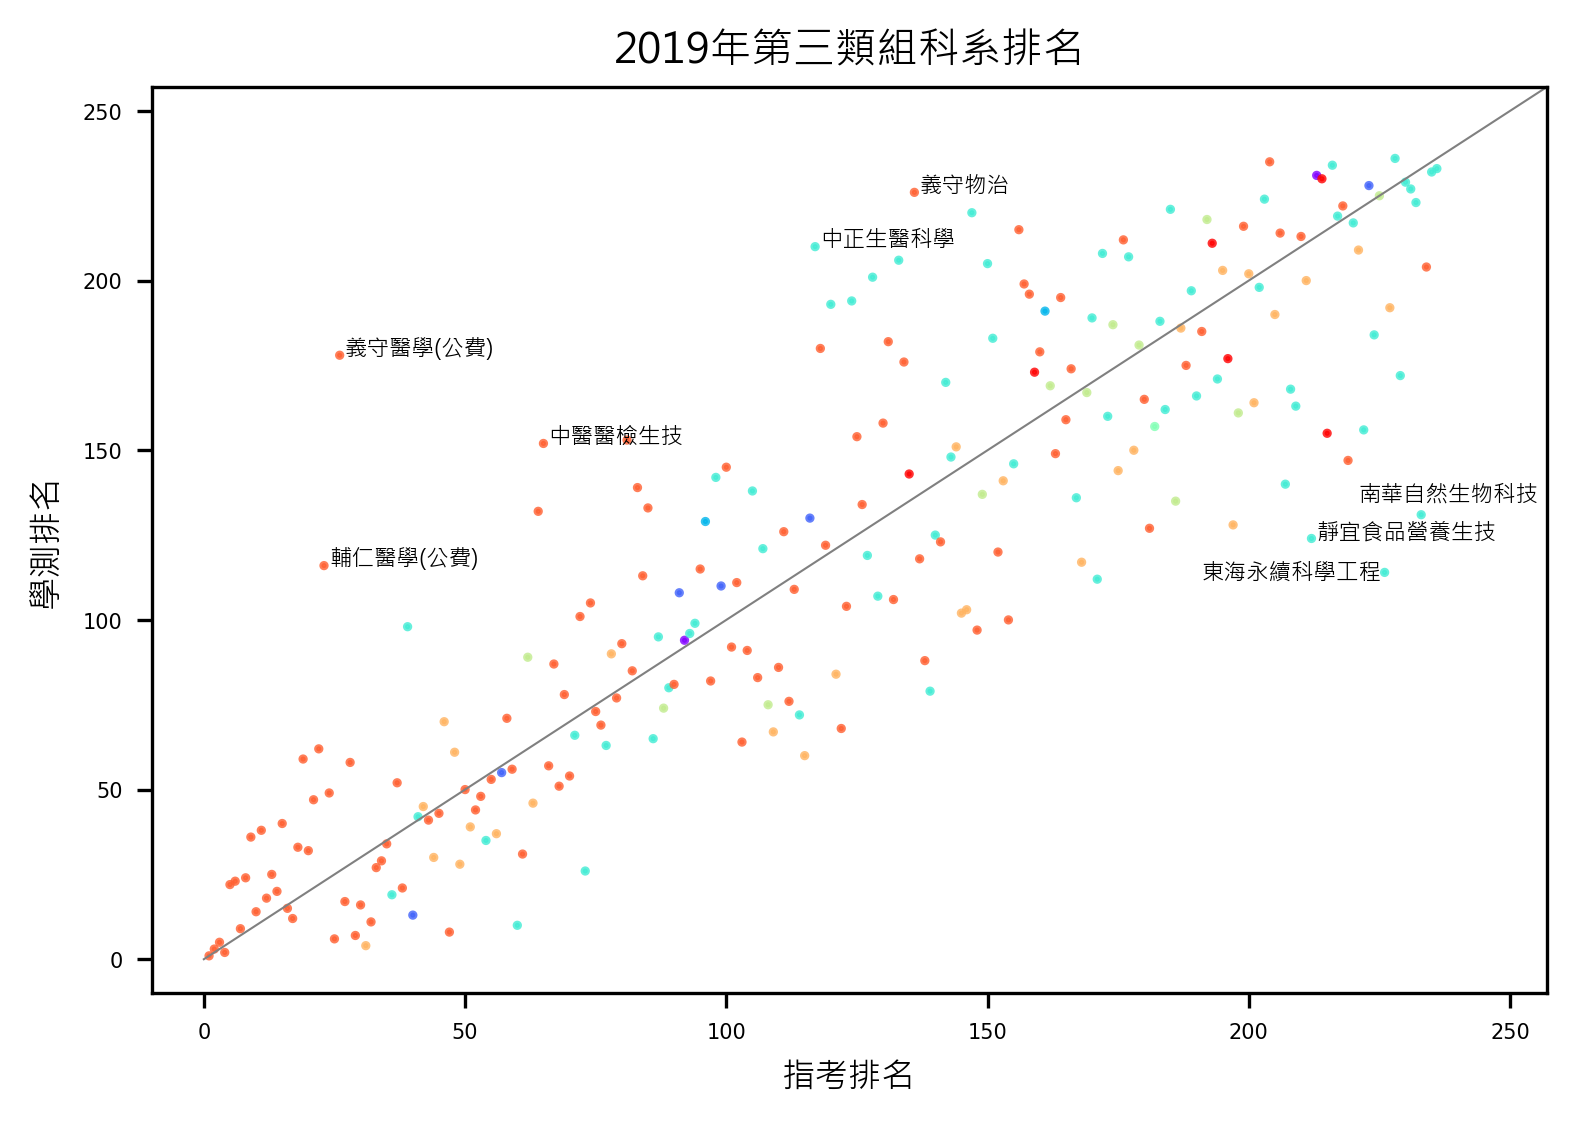

In [22]:
import pandas as pd

department_ds = pd.read_csv('108cat3.csv', encoding="utf-8", dtype=str) 
depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['category_id']    #school:學校, category:系所類別
ndep = department_ds.shape[0] 


category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    if int(dep_color[i]) >= 2:
        dep_color[i] = colors[ int(dep_color[i])-2 ]
    else: 
        dep_color[i] = colors[ int(dep_color[i])-1 ]

plot_result(2, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 5.4, 
        title = '2019年第三類組科系排名', markersize= 1.5, dpi = 300, datascale = 1)

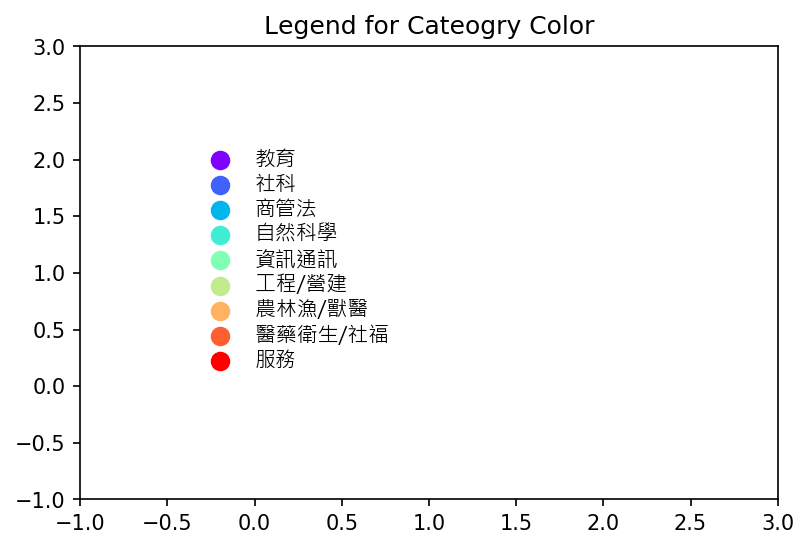

In [23]:
categoryName = ['教育','社科','商管法','自然科學','資訊通訊','工程/營建 ','農林漁/獸醫 ','醫藥衛生/社福 ','服務']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for Cateogry Color")

for i in range(category_df.shape[0]):
    thecolor = colors[i]
    ax.set_xlim([-1, 3])
    ax.set_ylim([-1, 3])
    x = -0.2
    y = 2-i/4.5  
    ax.scatter(x, y, s = 70, color = thecolor)    
    ax.annotate(categoryName[i], (x+0.2, y-0.05), fontsize=10,  fontproperties=ChineseFont2)
plt.show()
